## *Develop a model to predict individual medical insurance charges based on personal attributes.*
==============================================================================================================

Dataset Overview:
-----------------
The dataset contains 1,338 records with the following features:

• age: Age of the individual

• sex: Gender (male/female)

• bmi: Body Mass Index

• children: Number of children covered by insurance

• smoker: Smoking status (yes/no)

• region: Residential region in the U.S. (northeast, southeast, southwest, northwest)

• charges: Medical insurance charges (target variable)

Tasks:
-------

• Data Exploration:
1. Understand the distribution of each feature.
2. Identify relationships between features and the target variable.

• Data Preprocessing:
1. Handle missing values if any.
2. Encode categorical variables appropriately.
3. Normalize or scale features if necessary.

• Model Development:
1. Split the data into training and testing sets.
2. Train a regression model (e.g., Linear Regression) to predict charges.

• Evaluate the model's performance  using appropriate metrics (e.g., Mean Squared Error, R-squared).

• Provide interpretations of the model's findings.

============================================================================================================

#**Step  1: Data Exploration**

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('insurance.csv')

# Display the first few rows and basic info
df_info = df.info()
df_head = df.head()
df_describe = df.describe(include='all')

df_info, df_head, df_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
                 age   sex          bmi     children smoker     region  \
 count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
 unique          NaN     2          NaN          NaN      2          4   
 top             NaN  male          NaN          NaN     no  southeast   
 freq            NaN   676          NaN          NaN   1064        364   
 mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
 std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
 min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
 25%      

In [18]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [19]:
print(df['charges'].max()), print(df['charges'].min())
df['age'].max(),df['age'].min()
df['bmi'].min(),df['bmi'].max()


63770.42801
1121.8739


(15.96, 53.13)

# **Summary**:

The dataset contains 1,338 records with no missing values and includes 7 features: age, sex, bmi, children, smoker, region, and charges.

**Data** **Summary**:

1. Numerical Features:

*   age: Ranges from 18 to 64 years.
*   bmi: Ranges from ~16 to ~53.
*   charges (target): Ranges from 1,122 to 63,770.

2. Categorical Features:

*   sex: male, female
*   smoker: yes, no
*   region: northeast, southeast, southwest, northwest

## 1. Understanding Distribution of each feature

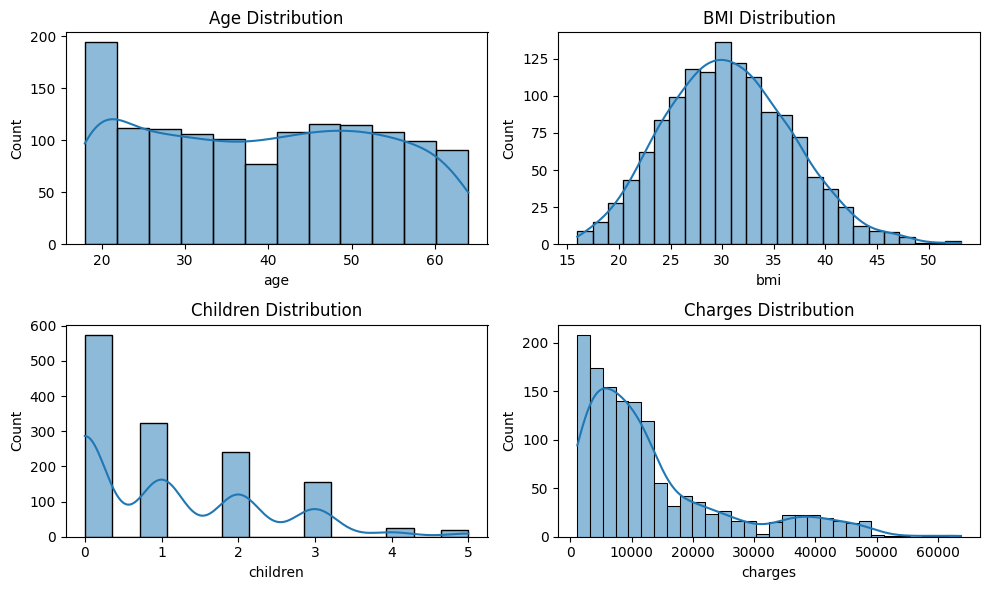

In [31]:
# Set up the figure size for plots

plt.figure(figsize=(10, 6))

# Create subplots for numerical feature distributions

plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['children'], kde=True)
plt.title('Children Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



**!!!Summary:**

The distributions of the numerical features are as follows:

1. Age: The distribution is fairly uniform across different ages.
2. BMI: The BMI distribution is approximately normal.
3. Children: Most individuals have fewer than 3 children, with the distribution being right-skewed.
4. Charges: The distribution of medical charges is right-skewed, with a majority of individuals incurring lower medical costs and a few outliers with very high costs.

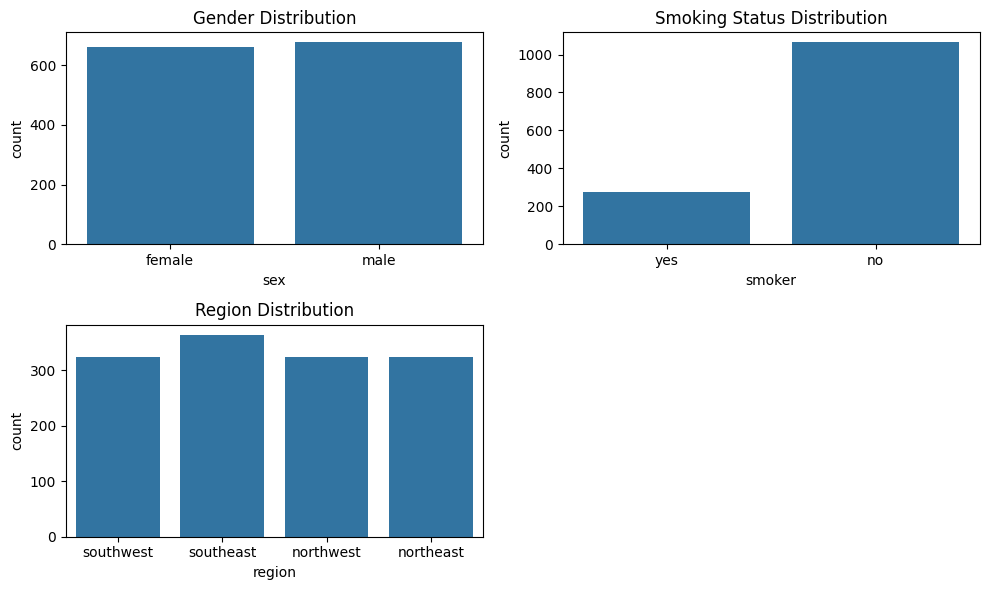

In [33]:
# Create subplot for categorical feature distributions

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='smoker', data=df)
plt.title('Smoking Status Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='region', data=df)
plt.title('Region Distribution')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

!!!**Summary**:

The dataset is fairly balanced in terms of gender and region, with a slight majority of individuals coming from the southeast region.

However, the smoking status is skewed, with a significantly larger proportion of non-smokers compared to smokers.

This distribution will be important to consider when modeling insurance charges, as smoking status is a known strong factor affecting medical insurance costs.

# 2. Identify relationships between features and the target variable(charges)

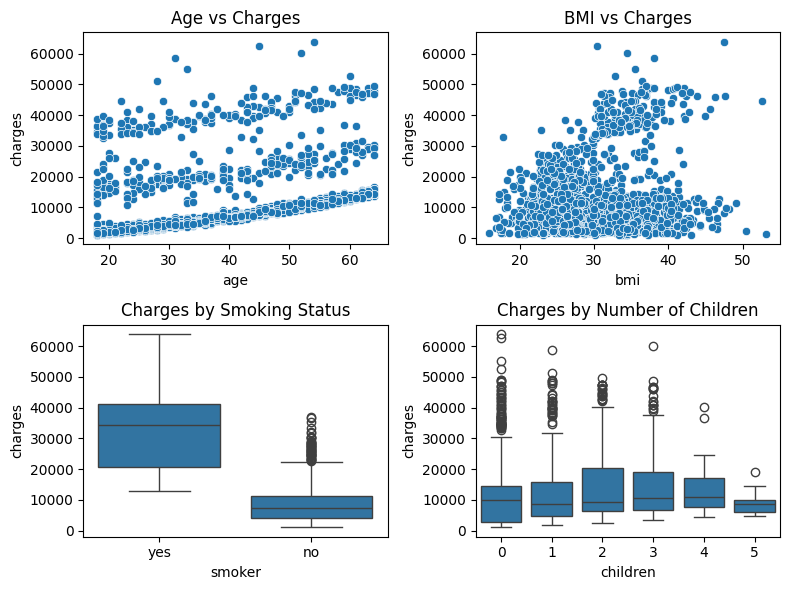

In [45]:
# Analyze relationships between features and the target variable
plt.figure(figsize=(8, 6))

# Scatter plot for age vs charges
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')

# Scatter plot for BMI vs charges
plt.subplot(2, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

# Boxplot for charges by smoker status
plt.subplot(2, 2, 3)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')

# Boxplot for charges by number of children
plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges by Number of Children')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



!!!**Summary**:

! Age and smoking status are the most influential factors driving up medical insurance charges.

! BMI shows a positive but more variable relationship with charges.

! Having more children is associated with slightly higher charges but with less clear impact.

! There are notable high-cost outliers, especially among older smokers and individuals with high BMI.

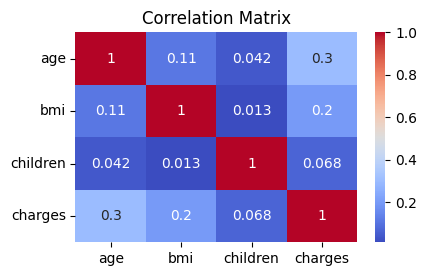

In [46]:
# Correlation matrix

# Select only numerical features for correlation calculation

numerical_features = df.select_dtypes(include=['number'])
correlation = numerical_features.corr()

plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# NOTE:

The categorical variables (sex, smoker, region) need to be encoded using one-hot encoding before calculating the correlation matrix. This ensures that all features are numeric.

!!!**Summary**

- Charges are most strongly correlated with age (0.3), followed by BMI (0.2), and very weakly with number of children (0.068).

- The correlations are all positive, but none are particularly strong.

- This suggests that while age and BMI have some impact on insurance charges, other factors (such as smoking status and region, not shown in this matrix) may play a much larger role in determining charges.

- The low correlations among features indicate low multicollinearity, which is good for regression modeling.

Conclusion:

Age and BMI have some predictive power for insurance charges, but the relatively low correlation values highlight the importance of including additional variables (like smoking status and region)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


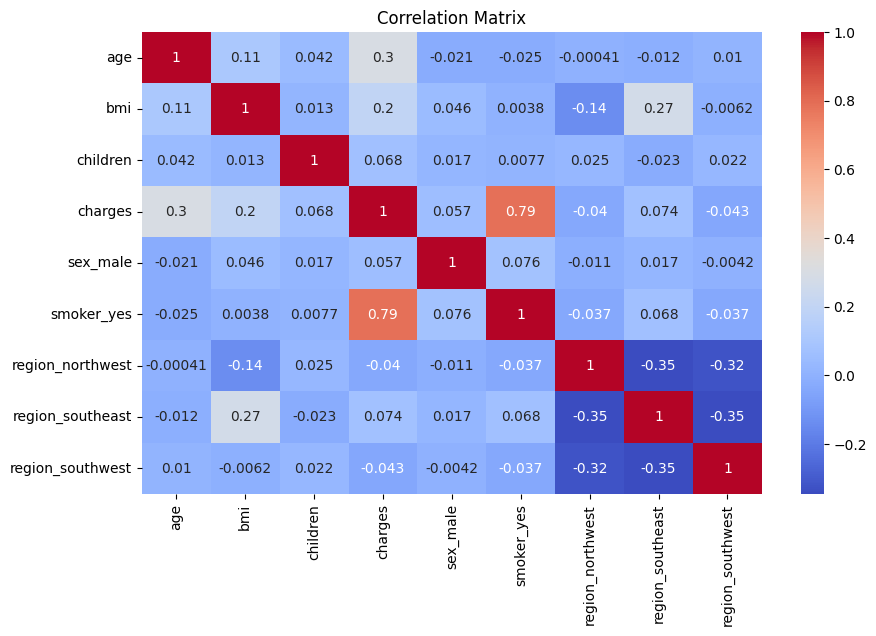

In [54]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Normalize Features
scaler = StandardScaler()
data_encoded[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(data_encoded[['age', 'bmi', 'children', 'charges']])
print(df.head())

# Step 3: Correlation Matrix
plt.figure(figsize=(10, 6))
correlation = data_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**!!!Summary:**

- *Smoking status is by far the most influential factor on insurance charges.*

- Age and BMI also contribute to higher charges, but less so than smoking.

- Region has some influence, particularly in relation to BMI, but does not directly correlate strongly with charges.

- Sex and number of children have negligible effects on insurance charges.

The low correlations among most features suggest low multicollinearity, which is favorable for regression modeling.
When predicting medical insurance charges, smoking status should be considered the most critical factor, followed by age and BMI. Other features such as region, sex, and number of children have minimal direct impact on charges according to this correlation analysis.

# **Step 2: Data Preprocessing**

## 1. Handle missing values if any.

In [49]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [56]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## 2. Encode categorical variables appropriately.

In [57]:
# One-hot encoding for categorical variables

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns_binary = encoder.fit_transform(df[['sex', 'smoker']])
feature_names_binary = encoder.get_feature_names_out(['sex', 'smoker'])

In [60]:
feature_names_binary

array(['sex_male', 'smoker_yes'], dtype=object)

In [61]:
encoded_columns_binary

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [62]:
# Creating a DataFrame for the binary values column
encoded_df__binary = pd.DataFrame(encoded_columns_binary, columns=feature_names_binary)
encoded_df__binary.head(2)

,sex_male,smoker_yes
0,0.0,1.0
1,1.0,0.0


In [65]:
encoder = OneHotEncoder(sparse_output=False)
encoded_columns_region = encoder.fit_transform(df[['region']])
feature_names_region = encoder.get_feature_names_out(['region'])
print(feature_names_region)
print(encoded_columns_region)

['region_northeast' 'region_northwest' 'region_southeast'
 'region_southwest']
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [66]:
# Creating a DataFrame from the encoded Region columns
encoded_df_region= pd.DataFrame(encoded_columns_region, columns=feature_names_region)
encoded_df_region.head(2)

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0


In [67]:
# Drop smoker, sex, and region columns from the original data

df = df.drop(['sex', 'smoker', 'region'], axis=1)

# Merge the Original data with encoded Sex, Smoker and region columns

# Concatenate the encoded columns with the original dataset

data_encoded = pd.concat([df,encoded_df__binary, encoded_df_region], axis=1)
data_encoded.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.77,1,1725.5523,1.0,0.0,0.0,0.0,1.0,0.0


## 3. Normalize features

In [70]:
# Normalize Features

# Standardizing age and BMI
standard_scaler = StandardScaler()
data_encoded[['age', 'bmi']] = standard_scaler.fit_transform(data_encoded[['age', 'bmi']])

# Normalizing charges
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_encoded['charges'] = min_max_scaler.fit_transform(data_encoded[['charges']])

# Display the first few rows of the modified dataset
data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,0.251611,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,1,0.009636,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,3,0.053115,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,0,0.333010,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,0,0.043816,1.0,0.0,0.0,1.0,0.0,0.0


The dataset has been successfully processed:

- Age and BMI have been standardized, meaning they now have a mean of 0 and a standard deviation of 1.

- Charges have been normalized, scaling its values to a range between 0 and 1

# **Step 3: Model Development**

# 1. Split the data into training and testing sets.

In [73]:
# Preparing the data for the model

X = data_encoded.drop('charges', axis=1)  # Features
y = data_encoded['charges']               # Target variable

In [74]:
X.head(2)


,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,1,1.0,0.0,0.0,0.0,1.0,0.0


In [76]:
y.head(2)

,charges
0,0.251611
1,0.009636


In [77]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,0.483668,-1.757474,2,0.0,0.0,0.0,1.0,0.0,0.0
1285,0.554869,-1.040599,0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
y_train.head(2)

,charges
560,0.128845
1285,0.118324


## 2. Train a regression model (e.g., Linear Regression) to predict charges.

In [80]:
# Creating and training the linear regression model

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

# **Step 3: Evaluate the model's performance  using appropriate metrics (e.g., Mean Squared Error, R-squared)**

In [81]:
# Making predictions on the test set

y_pred = linear_reg_model.predict(X_test)

In [82]:
len(y_pred)

268

In [83]:
y_test.count()

np.int64(268)

In [84]:
# Evaluating the model

mean_sq_err = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ",mean_sq_err)
print("R-squared Error: ",round(r2*100,3),' %')

Mean Squared Error:  0.00856006982417588
R-squared Error:  78.359  %


In [90]:
# Step 6: Interpret Findings

# Coefficients of the model
coefficients = linear_reg_model.coef_
print("Coefficients: ",coefficients)


Coefficients:  [ 5.76094544e-02  3.28001993e-02  6.78832560e-03 -2.96761704e-04
  3.77520746e-01  7.33592739e-03  1.41915355e-03 -3.16494219e-03
 -5.59013875e-03]


In [92]:
# Interpretation of findings
print("\nInterpretation of Findings:")
for feature, coef in zip(X.columns, coefficients):
    print(f"The coefficient for {feature} is {coef:.4f}. This means that for each unit increase in {feature}, the charges are expected to change by {coef:.4f} units, holding all other features constant.")



Interpretation of Findings:
The coefficient for age is 0.0576. This means that for each unit increase in age, the charges are expected to change by 0.0576 units, holding all other features constant.
The coefficient for bmi is 0.0328. This means that for each unit increase in bmi, the charges are expected to change by 0.0328 units, holding all other features constant.
The coefficient for children is 0.0068. This means that for each unit increase in children, the charges are expected to change by 0.0068 units, holding all other features constant.
The coefficient for sex_male is -0.0003. This means that for each unit increase in sex_male, the charges are expected to change by -0.0003 units, holding all other features constant.
The coefficient for smoker_yes is 0.3775. This means that for each unit increase in smoker_yes, the charges are expected to change by 0.3775 units, holding all other features constant.
The coefficient for region_northeast is 0.0073. This means that for each unit in

# **Summary and Insights:**

- Smoker	:The most significant predictor. Being a smoker (smoker_yes) increases the charges significantly, whereas being a non-smoker (smoker_no) decreases the charges. This aligns with our earlier analysis showing a strong correlation between smoking status and charges.

- Age has a positive coefficient, indicating that as age increases, so do the medical charges. This is consistent with the general expectation that older individuals tend to have higher medical expenses.

- BMI	Similar to age, a higher BMI is associated with higher medical charges. The positive coefficient for BMI reflects this relationship.

- Region	Different regions have varying impacts on medical charges, with the North region having a slightly positive effect and the Southeast and Southwest regions having a negative effect on charges. However, these effects are relatively small compared to factors like smoking status, age, and BMI.

- Children	The number of children/dependents also has a small positive effect on charges.
Sex	The impact of gender (male or female) on charges is minimal, as indicated by the very small coefficients.